# House Prices: Advanced Regression Techniques

### AI TF 머신러닝 과제

* https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
* Predict sales prices and practice feature engineering, RFs, and gradient boosting

### File descriptions

* **input/train.csv** 테스트 셋
* **input/test.csv** 트레인 셋
* **input/data_description.txt** 데이터 설명
* **input/sample_sumbission.csv** 정답 제출 샘플

In [1]:
import pandas as pd
import numpy as np

## Load Dataset

In [2]:
# train data
train = pd.read_csv("input/train.csv", index_col="Id") 

print(train.shape)
train.head()

(1460, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# train data 기초통계량 확인
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1984.865753,103.685262,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,20.645407,181.066207,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
test = pd.read_csv("input/test.csv", index_col="Id") #Test Data Load

print(test.shape)
test.head()

(1459, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
test.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


### Explore

In [7]:
# 차트를 jupyter notebook에 출력해서 보기 위한 명령어
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

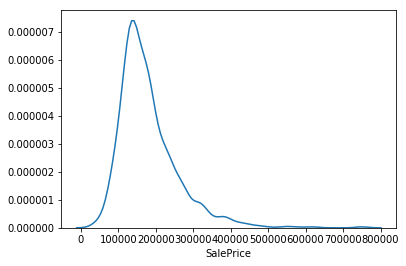

In [9]:
sns.distplot(train['SalePrice'], hist=False);

In [10]:
# df.skew : 왜도, 평균으로 부터 왼쪽/오른쪽으로 치우친 정도 (0 정상, - 오른쪽, + 왼쪽)
# df.kurt() : 첨도, 표준(정규분포) 위로 뾰족, 납작한 정도 ( > 3 뾰족, < 3 납작, =3 표준)
# df.var() : 분산, 평균에서 떨어진 정도(제곱)
# df.std() : 표준편차, 평균에서 떨어진 정도
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


### Relationship with numerical variables

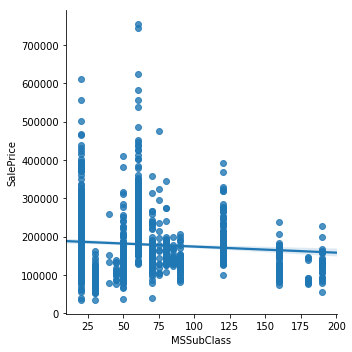

In [11]:
sns.lmplot(data=train, x="MSSubClass", y="SalePrice")

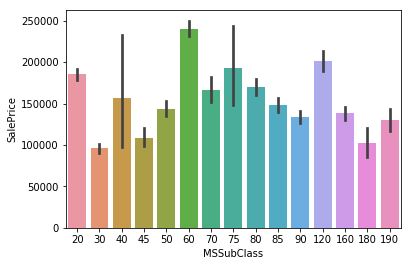

In [12]:
sns.barplot(data=train, x="MSSubClass", y="SalePrice")

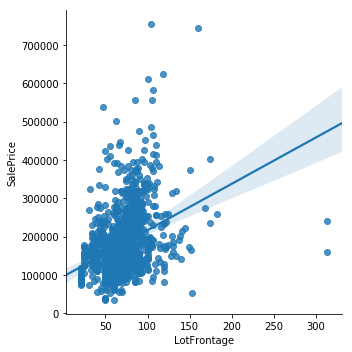

In [13]:
sns.lmplot(data=train, x="LotFrontage", y="SalePrice", fit_reg=True)

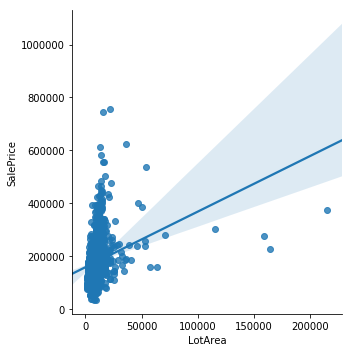

In [14]:
sns.lmplot(data=train, x="LotArea", y="SalePrice", fit_reg=True)

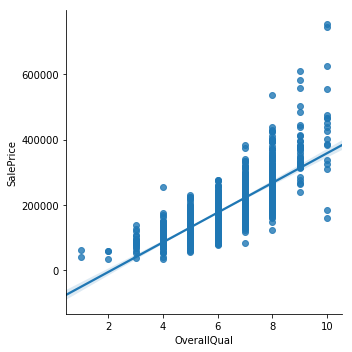

In [15]:
sns.lmplot(data=train, x="OverallQual", y="SalePrice", fit_reg=True)

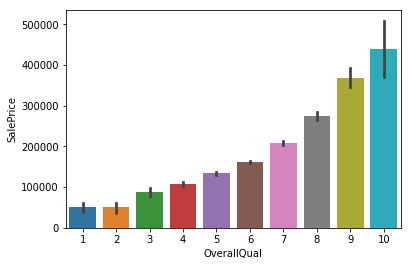

In [41]:
sns.barplot(data=train, x="OverallQual", y="SalePrice")

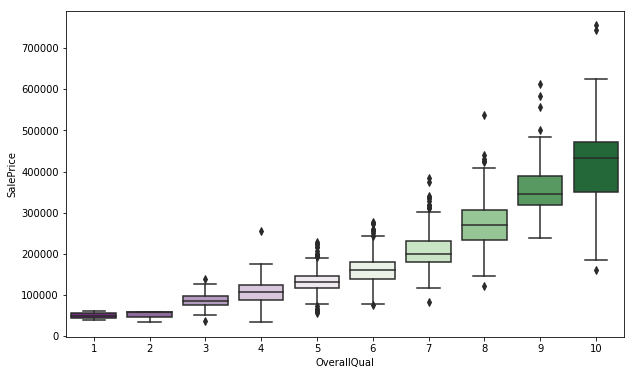

In [45]:
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(10, 6)
sns.boxplot(x="OverallQual", y="SalePrice", data=train, palette="PRGn", ax=ax1)

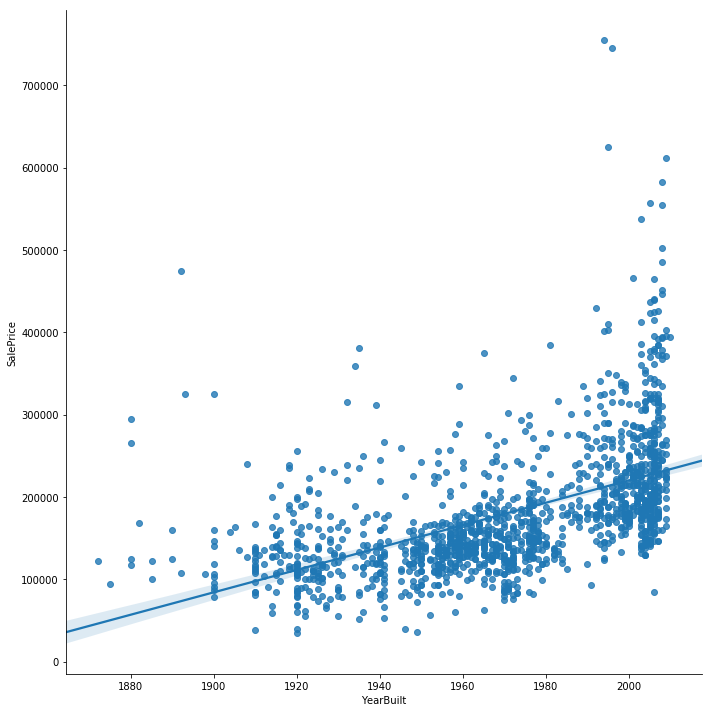

In [35]:
# train.loc[train["YearBuilt"] == " ", "YearBuilt"] = 1900
# train["YearBuilt"] = pd.to_numeric(train["YearBuilt"])
sns.lmplot(data=train, x="YearBuilt", y="SalePrice", size=10, fit_reg=True)

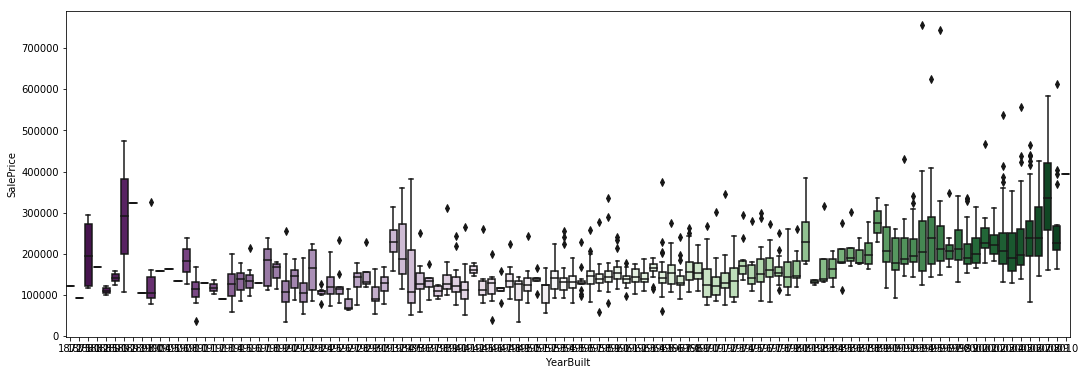

In [48]:
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 6)
sns.boxplot(x="YearBuilt", y="SalePrice", data=train, palette="PRGn", ax=ax1)

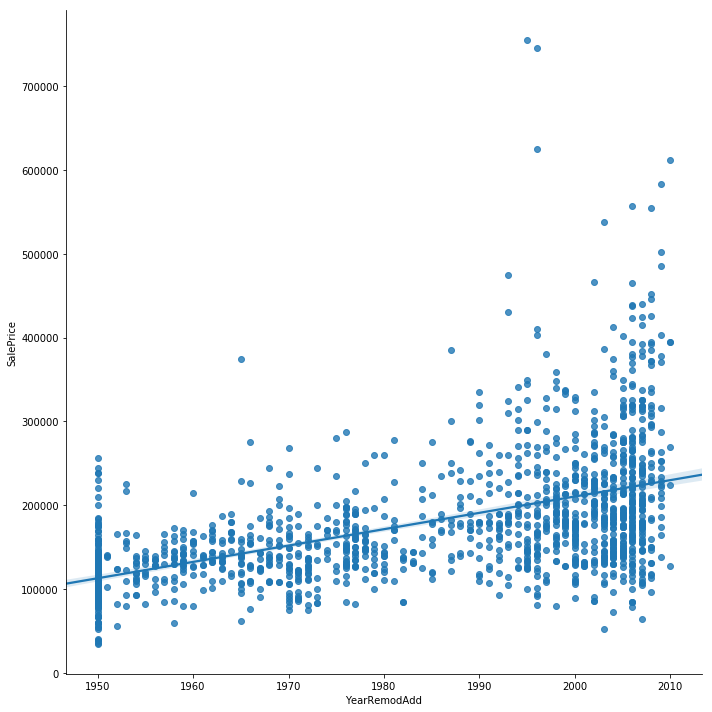

In [36]:
# train["YearBuilt"] = pd.to_numeric(train["YearBuilt"])
sns.lmplot(data=train, x="YearRemodAdd", y="SalePrice", size=10, fit_reg=True)

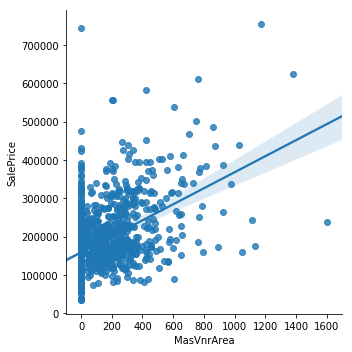

In [38]:
train['MasVnrArea'].fillna(0)
sns.lmplot(data=train, x="MasVnrArea", y="SalePrice", fit_reg=True)

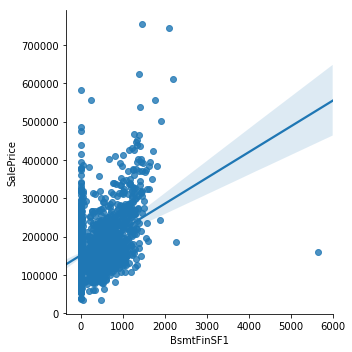

In [39]:
sns.lmplot(data=train, x="BsmtFinSF1", y="SalePrice", fit_reg=True)

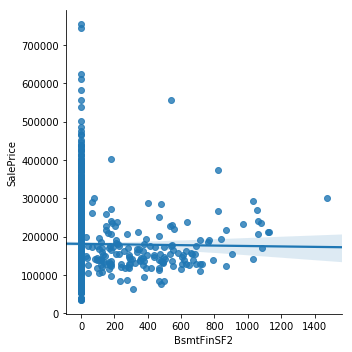

In [40]:
sns.lmplot(data=train, x="BsmtFinSF2", y="SalePrice", fit_reg=True)

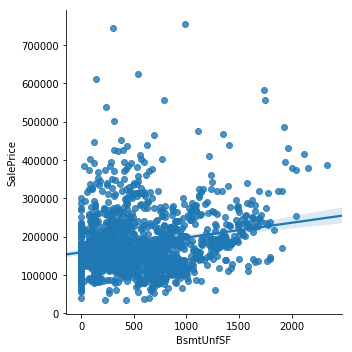

In [46]:
sns.lmplot(data=train, x="BsmtUnfSF", y="SalePrice", fit_reg=True)

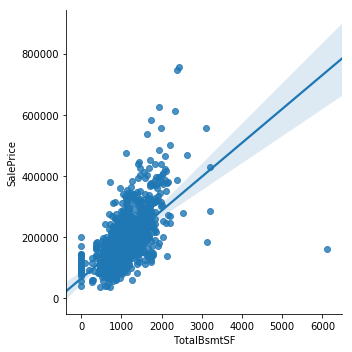

In [47]:
sns.lmplot(data=train, x="TotalBsmtSF", y="SalePrice", fit_reg=True)

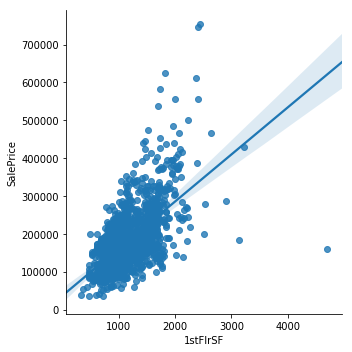

In [49]:
sns.lmplot(data=train, x="1stFlrSF", y="SalePrice", fit_reg=True)

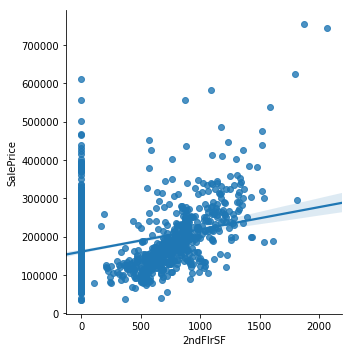

In [51]:
sns.lmplot(data=train, x="2ndFlrSF", y="SalePrice", fit_reg=True)

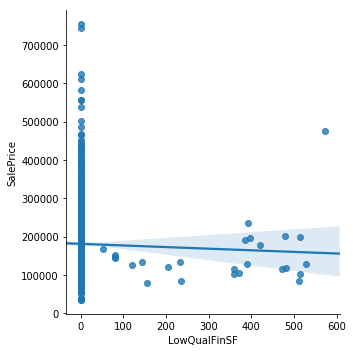

In [52]:
sns.lmplot(data=train, x="LowQualFinSF", y="SalePrice", fit_reg=True)

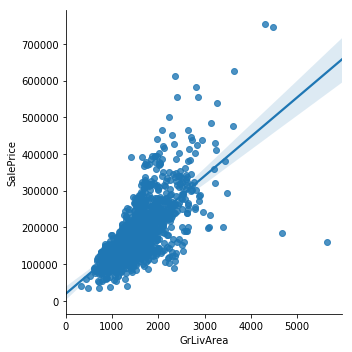

In [30]:
sns.lmplot(data=train, x="GrLivArea", y="SalePrice", fit_reg=True)

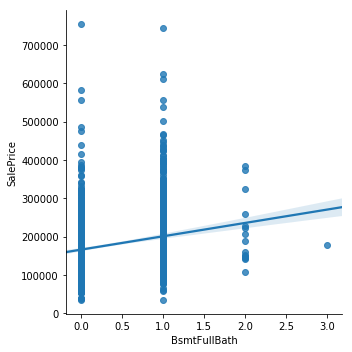

In [54]:
sns.lmplot(data=train, x="BsmtFullBath", y="SalePrice", fit_reg=True)

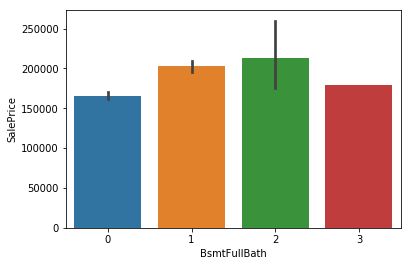

In [57]:
sns.barplot(data=train, x="BsmtFullBath", y="SalePrice")

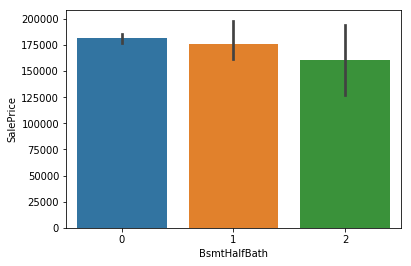

In [59]:
sns.barplot(data=train, x="BsmtHalfBath", y="SalePrice")

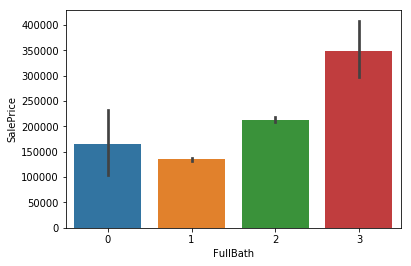

In [61]:
sns.barplot(data=train, x="FullBath", y="SalePrice")

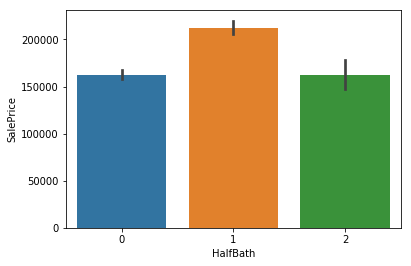

In [63]:
sns.barplot(data=train, x="HalfBath", y="SalePrice")

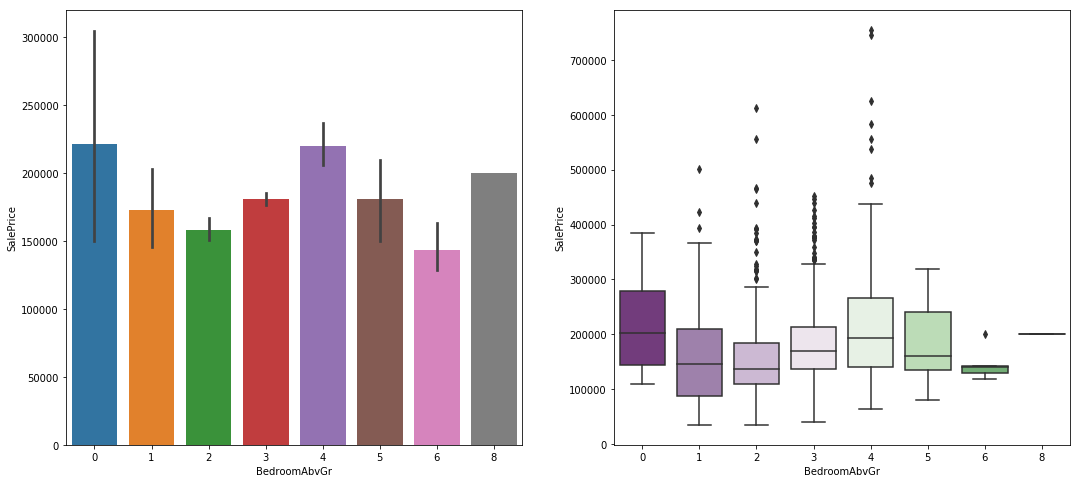

In [69]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 8)
sns.barplot(data=train, x="BedroomAbvGr", y="SalePrice", ax=ax1)
sns.boxplot(x="BedroomAbvGr", y="SalePrice", data=train, palette="PRGn", ax=ax2)

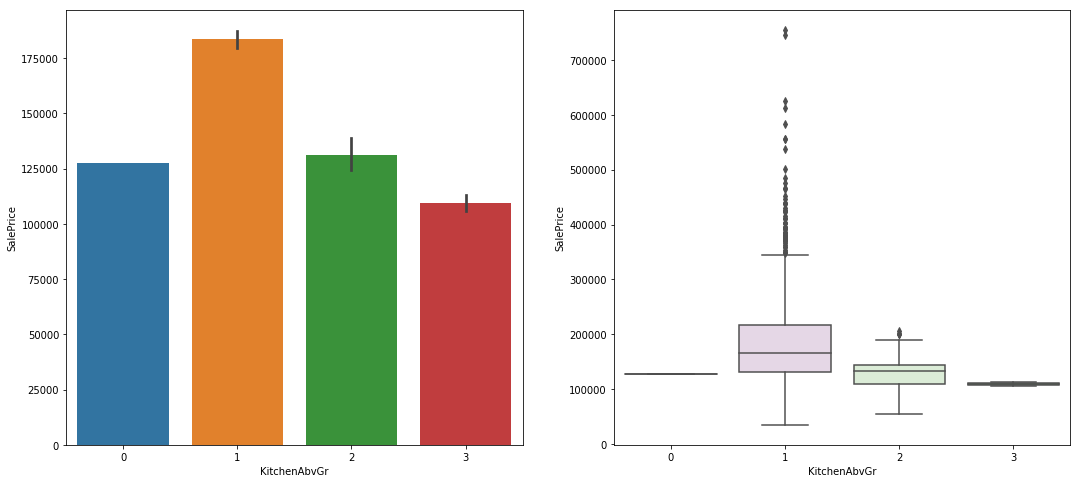

In [68]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 8)
sns.barplot(data=train, x="KitchenAbvGr", y="SalePrice", ax=ax1)
sns.boxplot(x="KitchenAbvGr", y="SalePrice", data=train, palette="PRGn", ax=ax2)

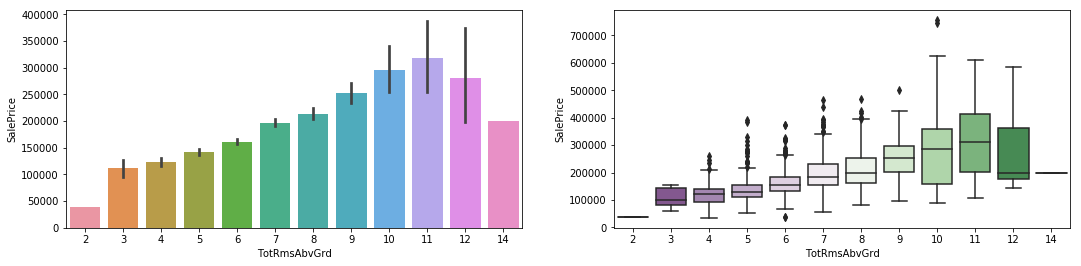

In [75]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)
sns.barplot(data=train, x="TotRmsAbvGrd", y="SalePrice", ax=ax1)
sns.boxplot(x="TotRmsAbvGrd", y="SalePrice", data=train, palette="PRGn", ax=ax2)

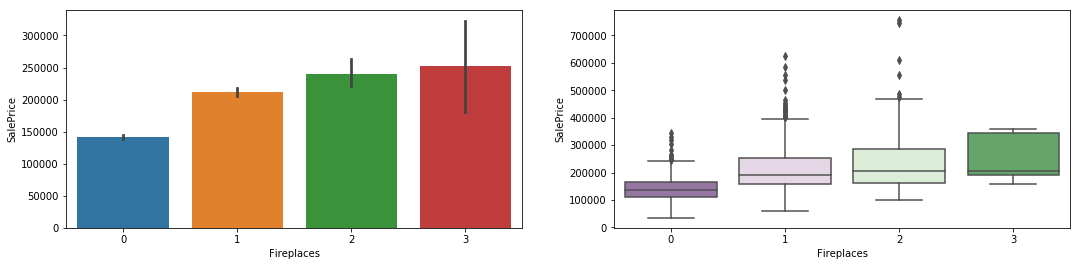

In [74]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)
sns.barplot(data=train, x="Fireplaces", y="SalePrice", ax=ax1)
sns.boxplot(x="Fireplaces", y="SalePrice", data=train, palette="PRGn", ax=ax2)

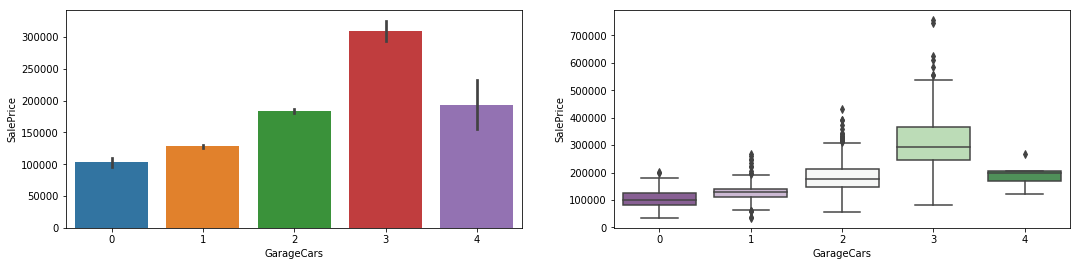

In [73]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)
sns.barplot(data=train, x="GarageCars", y="SalePrice", ax=ax1)
sns.boxplot(x="GarageCars", y="SalePrice", data=train, palette="PRGn", ax=ax2)

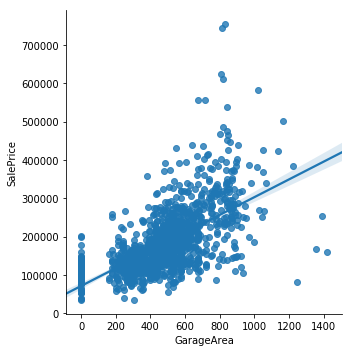

In [76]:
sns.lmplot(data=train, x="GarageArea", y="SalePrice", fit_reg=True)

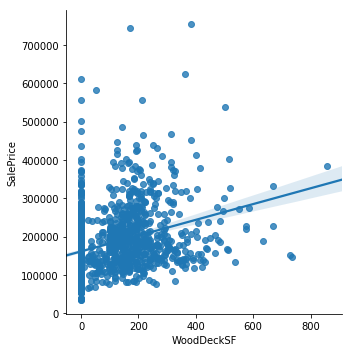

In [77]:
sns.lmplot(data=train, x="WoodDeckSF", y="SalePrice", fit_reg=True)

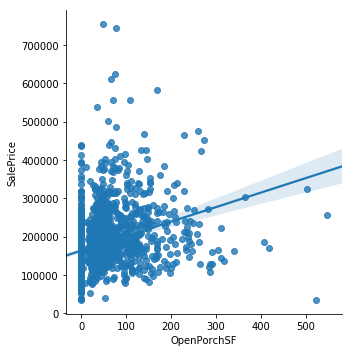

In [78]:
sns.lmplot(data=train, x="OpenPorchSF", y="SalePrice", fit_reg=True)

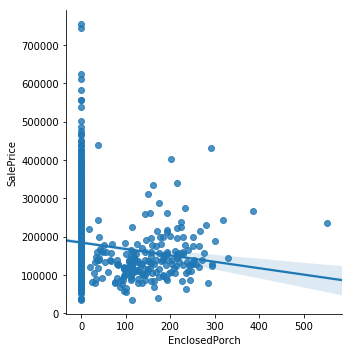

In [79]:
sns.lmplot(data=train, x="EnclosedPorch", y="SalePrice", fit_reg=True)

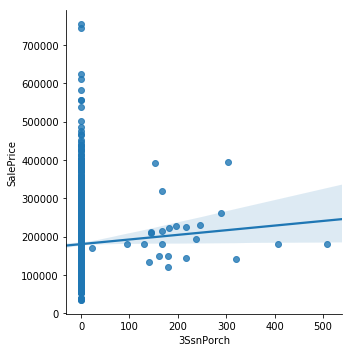

In [80]:
sns.lmplot(data=train, x="3SsnPorch", y="SalePrice", fit_reg=True)

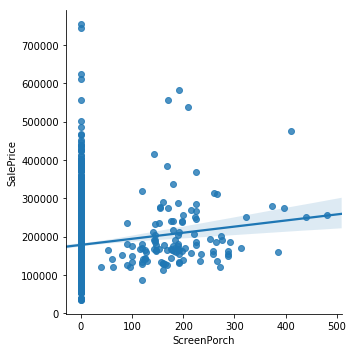

In [81]:
sns.lmplot(data=train, x="ScreenPorch", y="SalePrice", fit_reg=True)

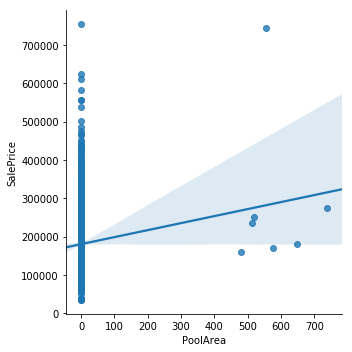

In [82]:
sns.lmplot(data=train, x="PoolArea", y="SalePrice", fit_reg=True)

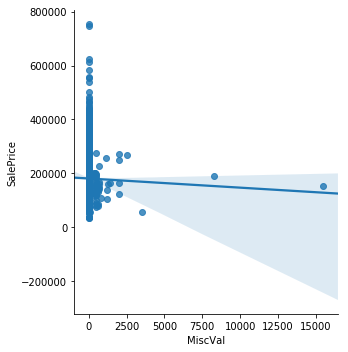

In [83]:
sns.lmplot(data=train, x="MiscVal", y="SalePrice", fit_reg=True)

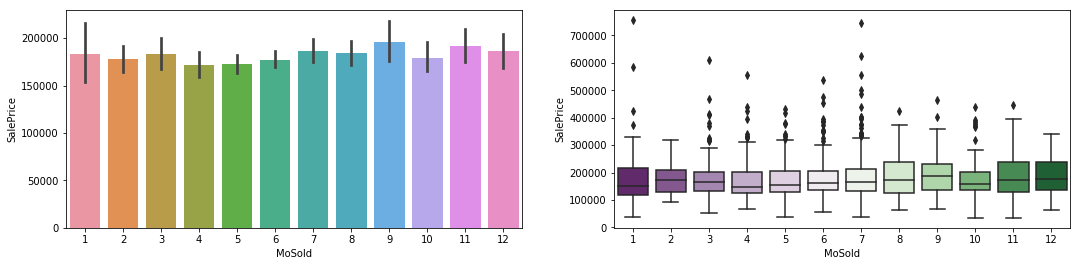

In [84]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)
sns.barplot(data=train, x="MoSold", y="SalePrice", ax=ax1)
sns.boxplot(x="MoSold", y="SalePrice", data=train, palette="PRGn", ax=ax2)

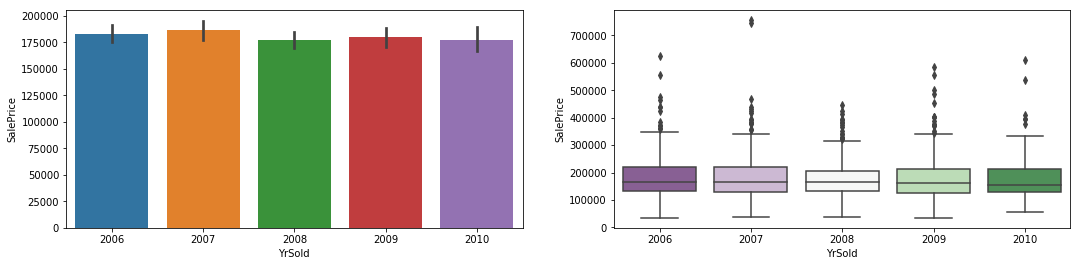

In [85]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)
sns.barplot(data=train, x="YrSold", y="SalePrice", ax=ax1)
sns.boxplot(x="YrSold", y="SalePrice", data=train, palette="PRGn", ax=ax2)

### Categorical Data

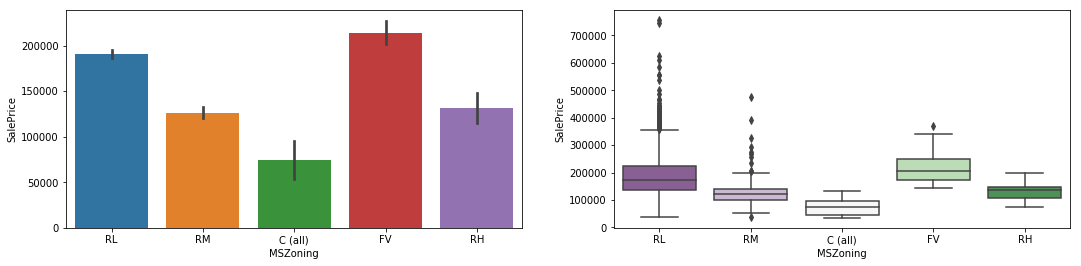

In [87]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)
sns.barplot(data=train, x="MSZoning", y="SalePrice", ax=ax1)
sns.boxplot(x="MSZoning", y="SalePrice", data=train, palette="PRGn", ax=ax2)

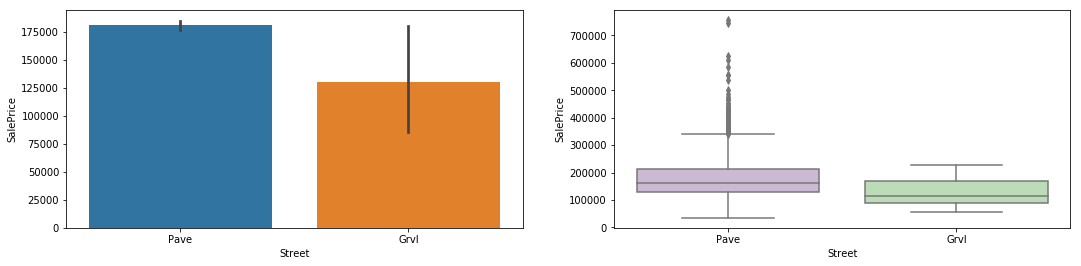

In [88]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)
sns.barplot(data=train, x="Street", y="SalePrice", ax=ax1)
sns.boxplot(x="Street", y="SalePrice", data=train, palette="PRGn", ax=ax2)

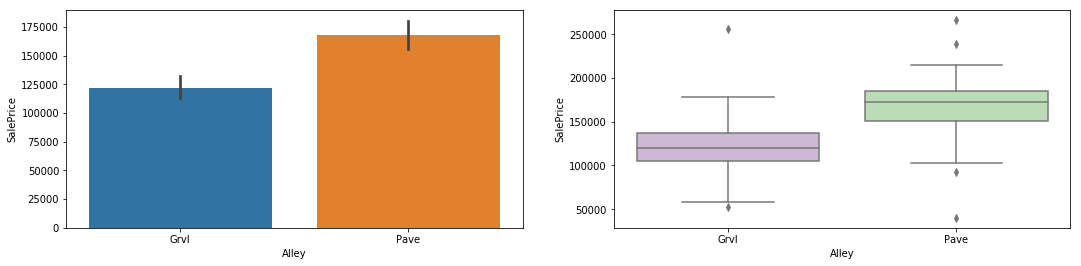

In [89]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)
sns.barplot(data=train, x="Alley", y="SalePrice", ax=ax1)
sns.boxplot(x="Alley", y="SalePrice", data=train, palette="PRGn", ax=ax2)

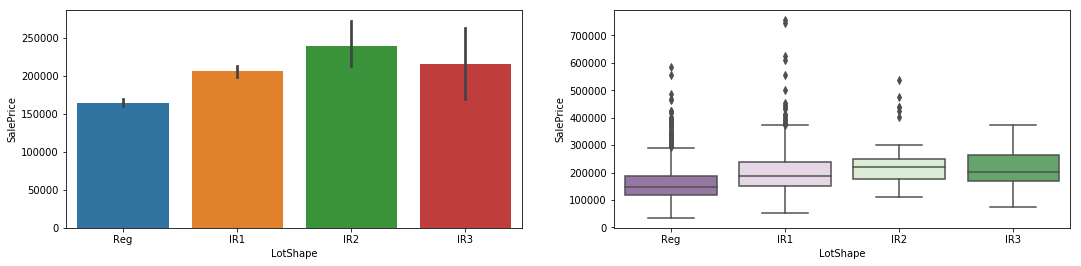

In [90]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)
sns.barplot(data=train, x="LotShape", y="SalePrice", ax=ax1)
sns.boxplot(x="LotShape", y="SalePrice", data=train, palette="PRGn", ax=ax2)

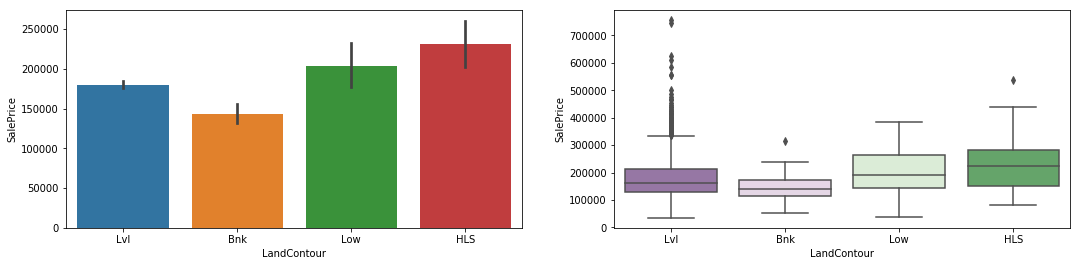

In [91]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)
sns.barplot(data=train, x="LandContour", y="SalePrice", ax=ax1)
sns.boxplot(x="LandContour", y="SalePrice", data=train, palette="PRGn", ax=ax2)

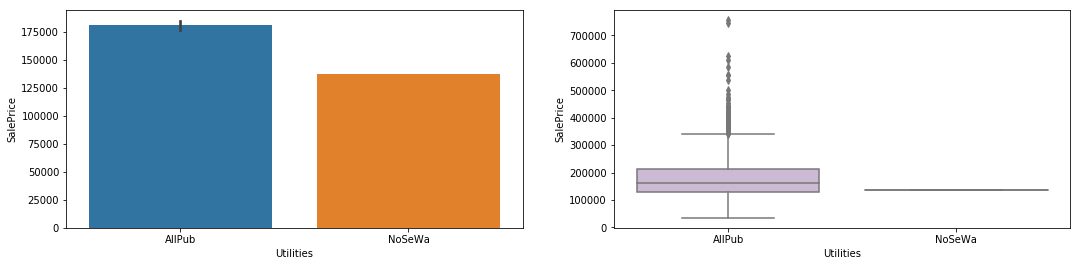

In [92]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)
sns.barplot(data=train, x="Utilities", y="SalePrice", ax=ax1)
sns.boxplot(x="Utilities", y="SalePrice", data=train, palette="PRGn", ax=ax2)

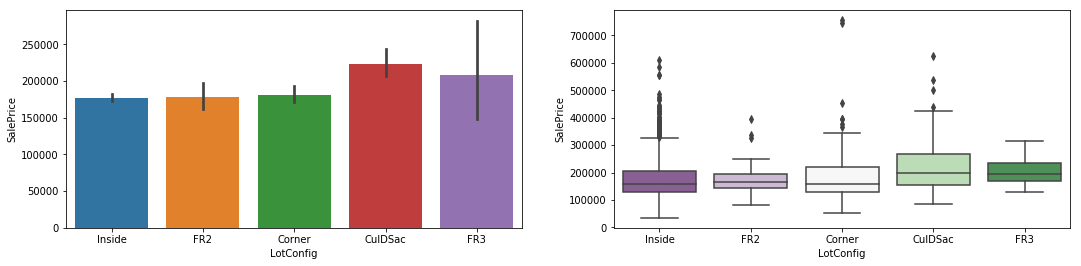

In [93]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)
sns.barplot(data=train, x="LotConfig", y="SalePrice", ax=ax1)
sns.boxplot(x="LotConfig", y="SalePrice", data=train, palette="PRGn", ax=ax2)

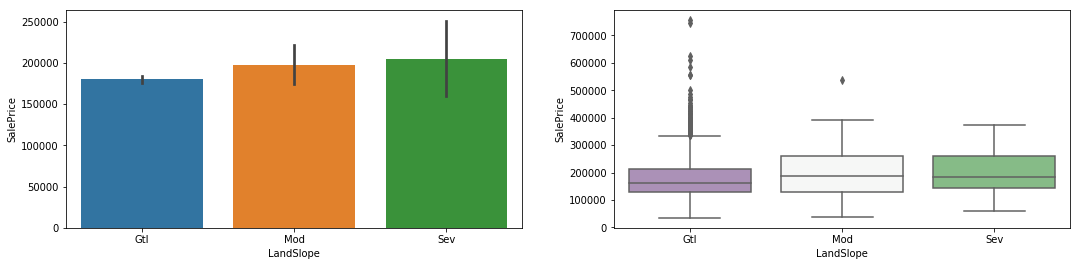

In [94]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)
sns.barplot(data=train, x="LandSlope", y="SalePrice", ax=ax1)
sns.boxplot(x="LandSlope", y="SalePrice", data=train, palette="PRGn", ax=ax2)

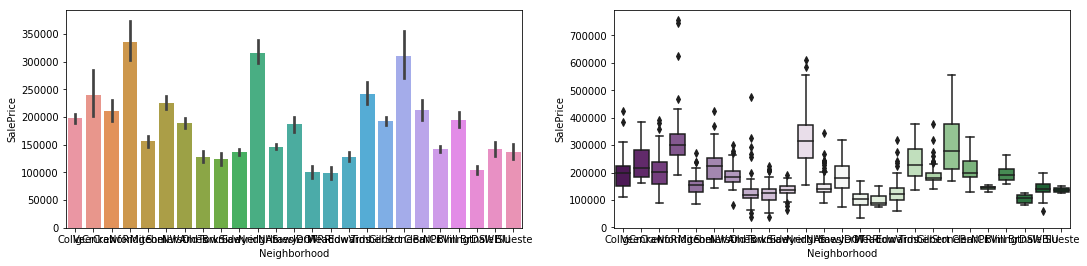

In [95]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)
sns.barplot(data=train, x="Neighborhood", y="SalePrice", ax=ax1)
sns.boxplot(x="Neighborhood", y="SalePrice", data=train, palette="PRGn", ax=ax2)

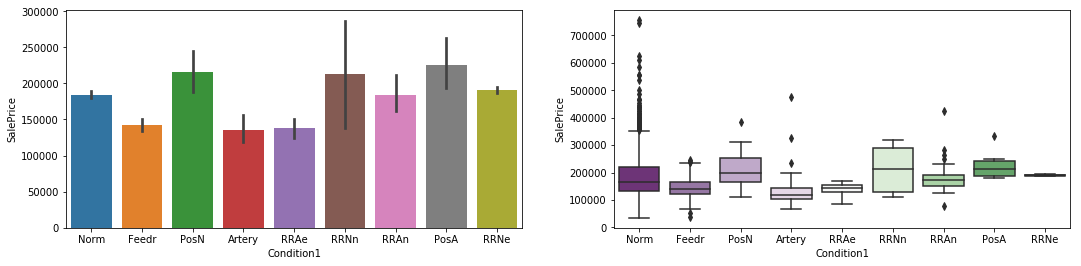

In [96]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)
sns.barplot(data=train, x="Condition1", y="SalePrice", ax=ax1)
sns.boxplot(x="Condition1", y="SalePrice", data=train, palette="PRGn", ax=ax2)

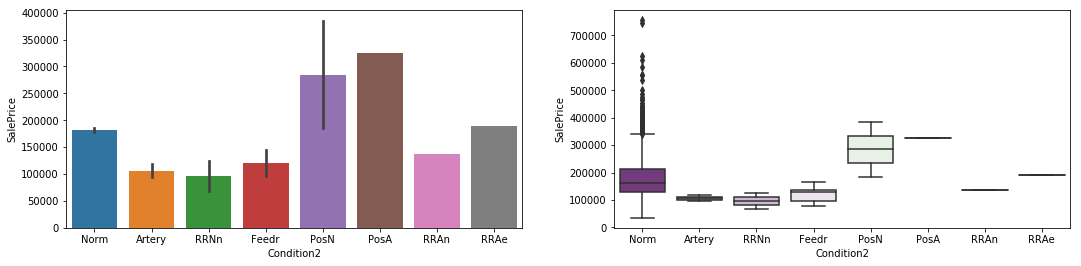

In [102]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)
sns.barplot(data=train, x="Condition2", y="SalePrice", ax=ax1)
sns.boxplot(x="Condition2", y="SalePrice", data=train, palette="PRGn", ax=ax2)

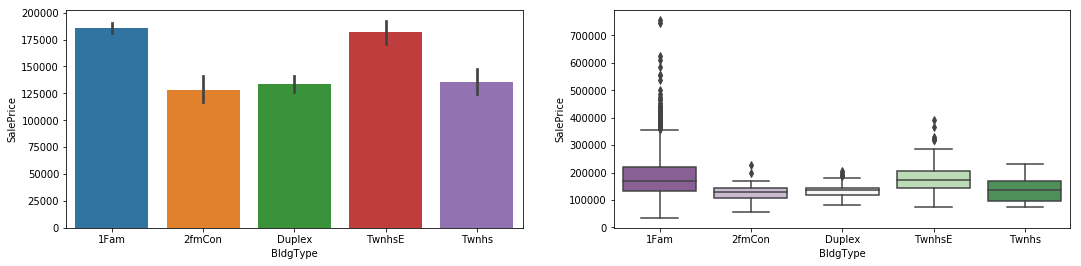

In [98]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)
sns.barplot(data=train, x="BldgType", y="SalePrice", ax=ax1)
sns.boxplot(x="BldgType", y="SalePrice", data=train, palette="PRGn", ax=ax2)

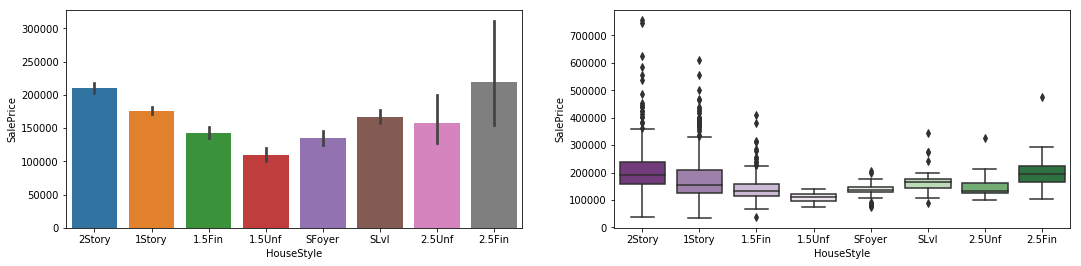

In [99]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)
sns.barplot(data=train, x="HouseStyle", y="SalePrice", ax=ax1)
sns.boxplot(x="HouseStyle", y="SalePrice", data=train, palette="PRGn", ax=ax2)

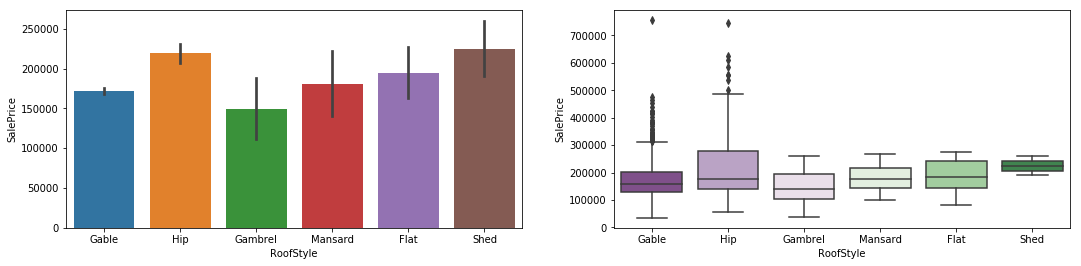

In [100]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)
sns.barplot(data=train, x="RoofStyle", y="SalePrice", ax=ax1)
sns.boxplot(x="RoofStyle", y="SalePrice", data=train, palette="PRGn", ax=ax2)

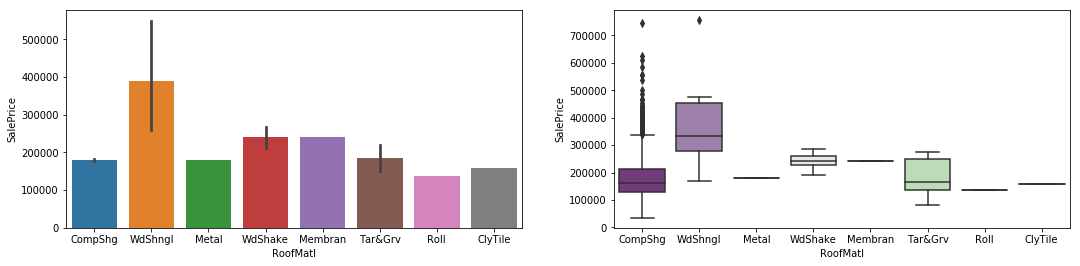

In [101]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)
sns.barplot(data=train, x="RoofMatl", y="SalePrice", ax=ax1)
sns.boxplot(x="RoofMatl", y="SalePrice", data=train, palette="PRGn", ax=ax2)

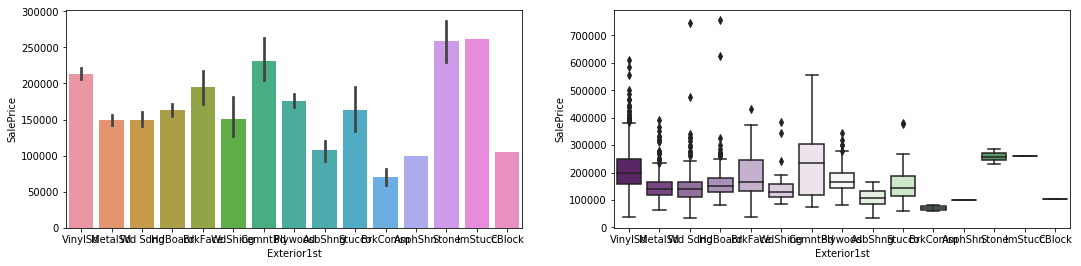

In [104]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)
sns.barplot(data=train, x="Exterior1st", y="SalePrice", ax=ax1)
sns.boxplot(x="Exterior1st", y="SalePrice", data=train, palette="PRGn", ax=ax2)

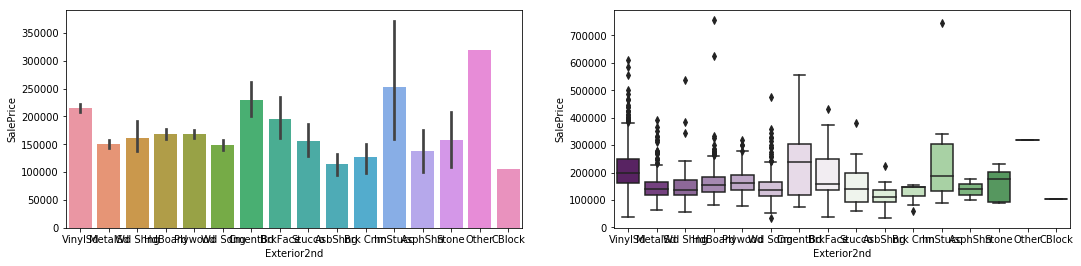

In [105]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)
sns.barplot(data=train, x="Exterior2nd", y="SalePrice", ax=ax1)
sns.boxplot(x="Exterior2nd", y="SalePrice", data=train, palette="PRGn", ax=ax2)

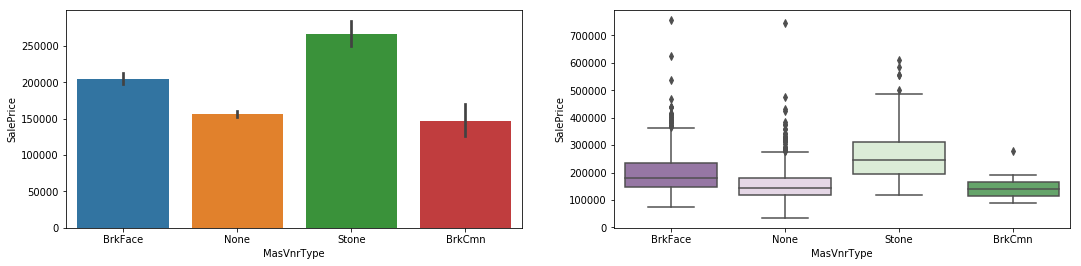

In [106]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)
sns.barplot(data=train, x="MasVnrType", y="SalePrice", ax=ax1)
sns.boxplot(x="MasVnrType", y="SalePrice", data=train, palette="PRGn", ax=ax2)

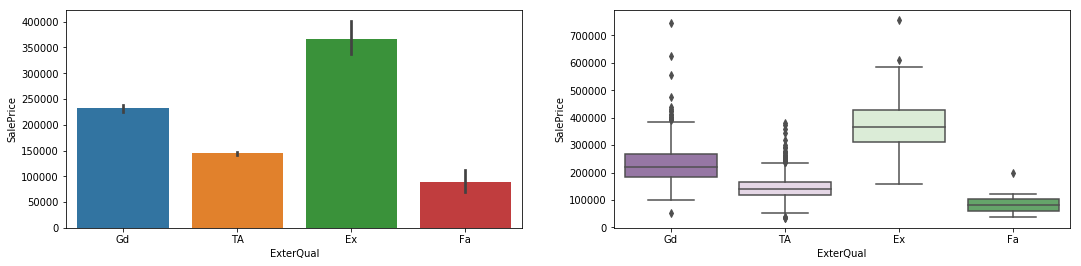

In [107]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)
sns.barplot(data=train, x="ExterQual", y="SalePrice", ax=ax1)
sns.boxplot(x="ExterQual", y="SalePrice", data=train, palette="PRGn", ax=ax2)

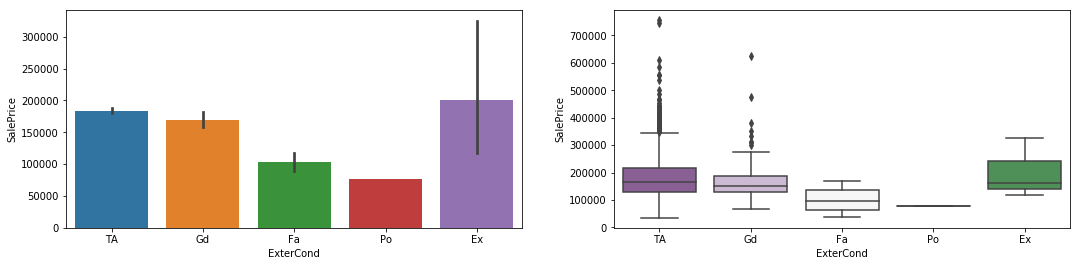

In [108]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)
sns.barplot(data=train, x="ExterCond", y="SalePrice", ax=ax1)
sns.boxplot(x="ExterCond", y="SalePrice", data=train, palette="PRGn", ax=ax2)

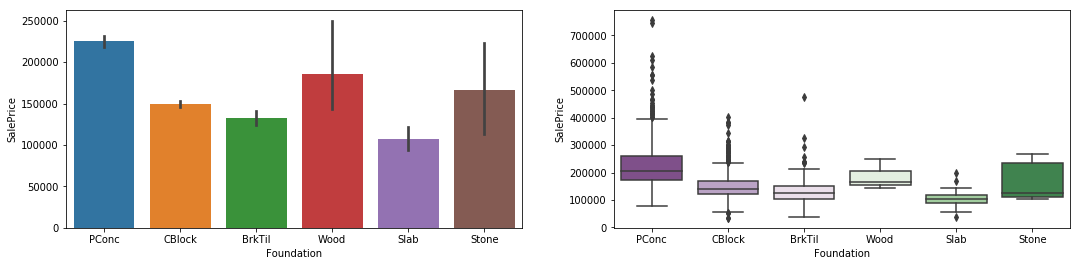

In [109]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)
sns.barplot(data=train, x="Foundation", y="SalePrice", ax=ax1)
sns.boxplot(x="Foundation", y="SalePrice", data=train, palette="PRGn", ax=ax2)

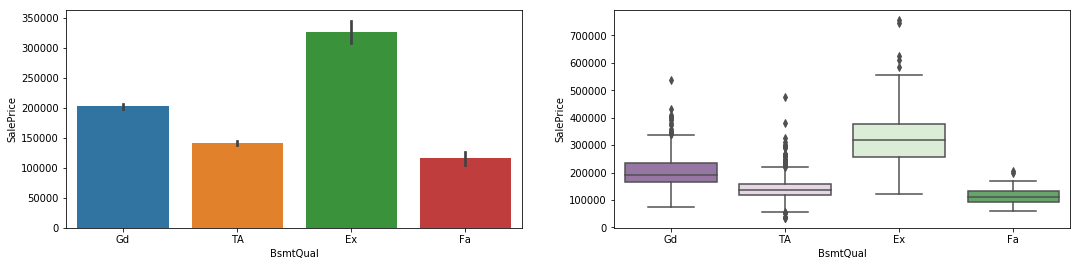

In [110]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)
sns.barplot(data=train, x="BsmtQual", y="SalePrice", ax=ax1)
sns.boxplot(x="BsmtQual", y="SalePrice", data=train, palette="PRGn", ax=ax2)

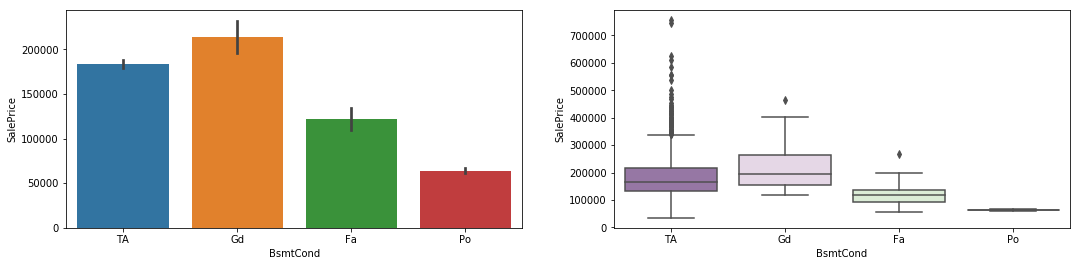

In [111]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)
sns.barplot(data=train, x="BsmtCond", y="SalePrice", ax=ax1)
sns.boxplot(x="BsmtCond", y="SalePrice", data=train, palette="PRGn", ax=ax2)

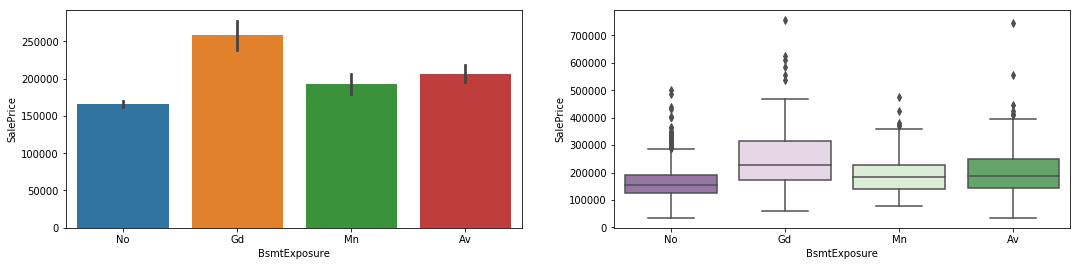

In [120]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)
sns.barplot(data=train, x="BsmtExposure", y="SalePrice", ax=ax1)
sns.boxplot(x="BsmtExposure", y="SalePrice", data=train, palette="PRGn", ax=ax2)

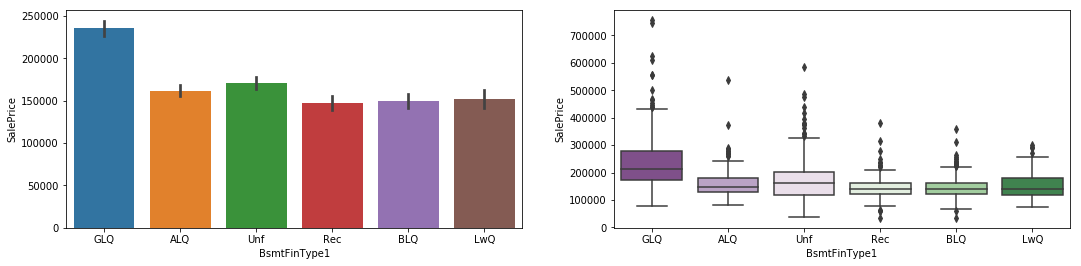

In [122]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)
sns.barplot(data=train, x="BsmtFinType1", y="SalePrice", ax=ax1)
sns.boxplot(x="BsmtFinType1", y="SalePrice", data=train, palette="PRGn", ax=ax2)

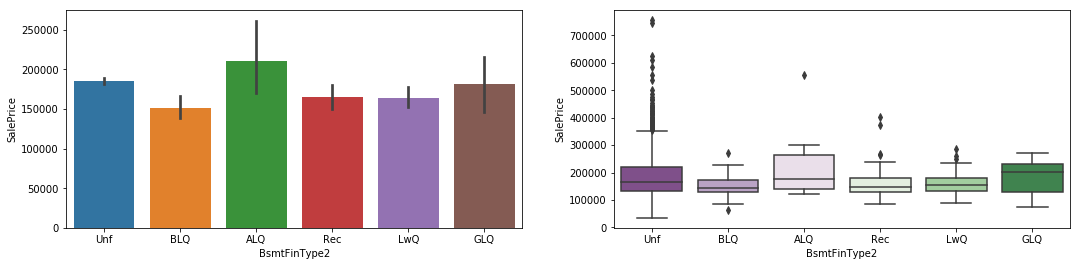

In [123]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)
sns.barplot(data=train, x="BsmtFinType2", y="SalePrice", ax=ax1)
sns.boxplot(x="BsmtFinType2", y="SalePrice", data=train, palette="PRGn", ax=ax2)

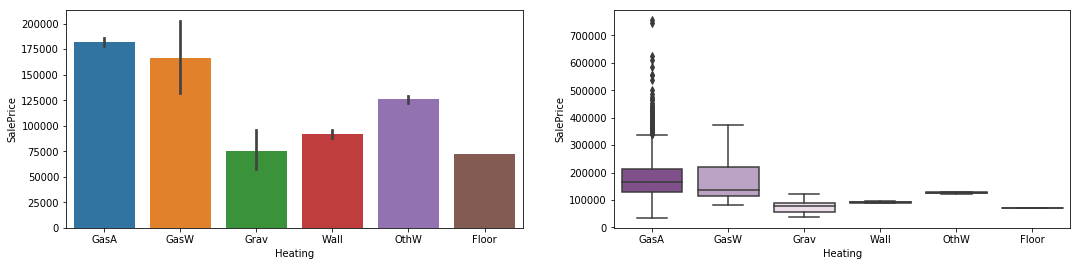

In [124]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)
sns.barplot(data=train, x="Heating", y="SalePrice", ax=ax1)
sns.boxplot(x="Heating", y="SalePrice", data=train, palette="PRGn", ax=ax2)

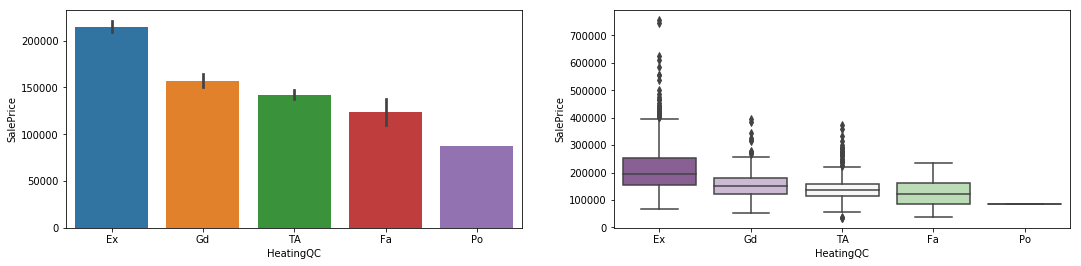

In [125]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)
sns.barplot(data=train, x="HeatingQC", y="SalePrice", ax=ax1)
sns.boxplot(x="HeatingQC", y="SalePrice", data=train, palette="PRGn", ax=ax2)

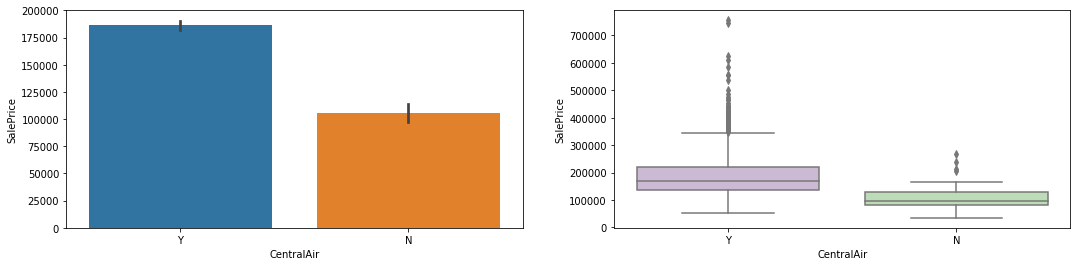

In [126]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)
sns.barplot(data=train, x="CentralAir", y="SalePrice", ax=ax1)
sns.boxplot(x="CentralAir", y="SalePrice", data=train, palette="PRGn", ax=ax2)

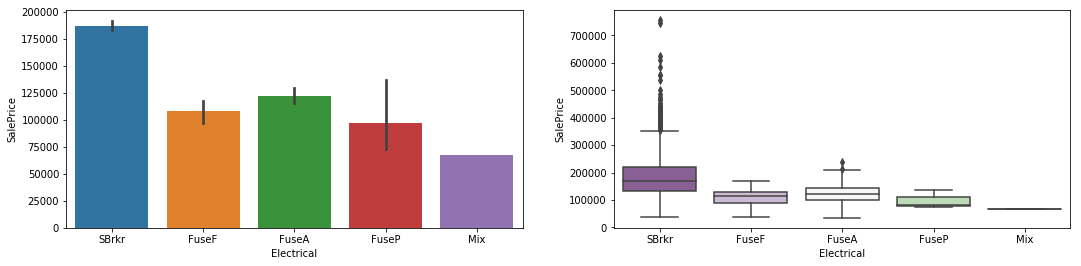

In [127]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)
sns.barplot(data=train, x="Electrical", y="SalePrice", ax=ax1)
sns.boxplot(x="Electrical", y="SalePrice", data=train, palette="PRGn", ax=ax2)

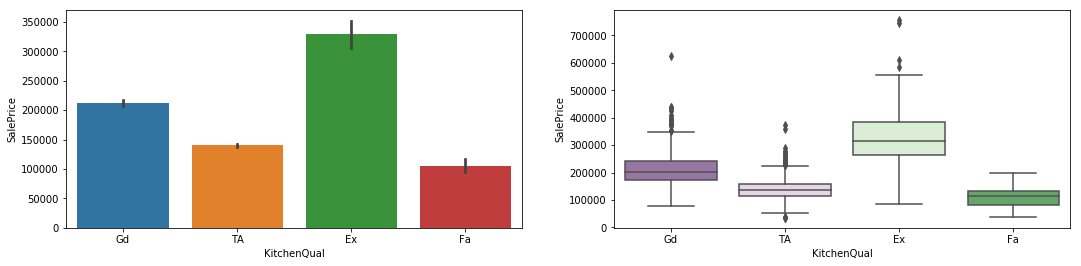

In [128]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)
sns.barplot(data=train, x="KitchenQual", y="SalePrice", ax=ax1)
sns.boxplot(x="KitchenQual", y="SalePrice", data=train, palette="PRGn", ax=ax2)

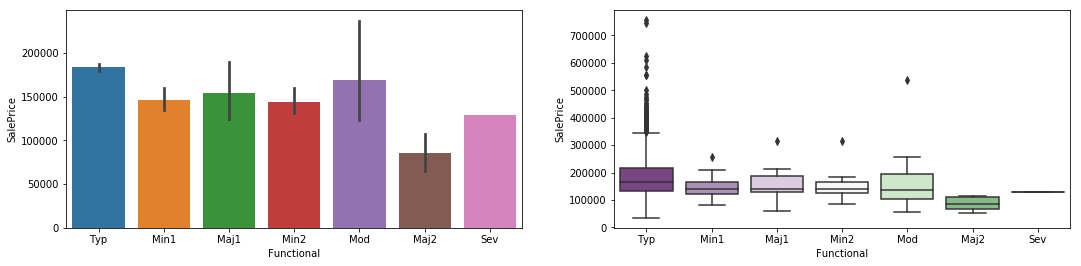

In [129]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)
sns.barplot(data=train, x="Functional", y="SalePrice", ax=ax1)
sns.boxplot(x="Functional", y="SalePrice", data=train, palette="PRGn", ax=ax2)

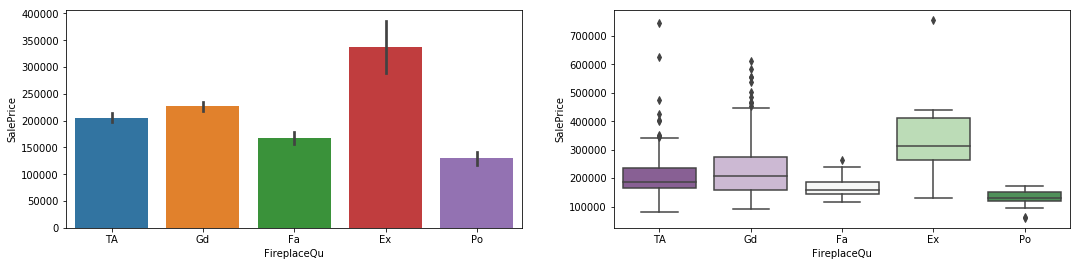

In [130]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)
sns.barplot(data=train, x="FireplaceQu", y="SalePrice", ax=ax1)
sns.boxplot(x="FireplaceQu", y="SalePrice", data=train, palette="PRGn", ax=ax2)

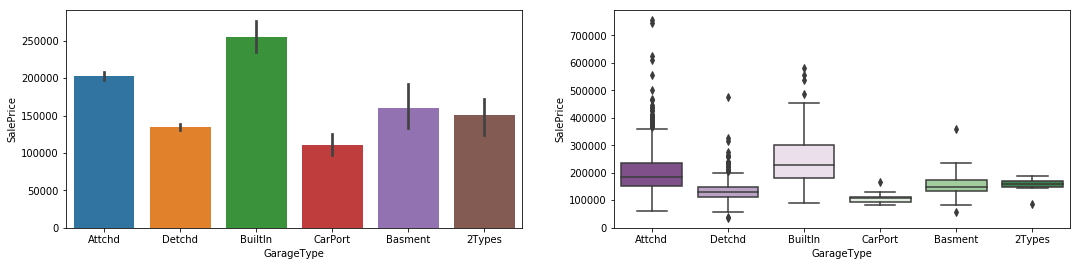

In [131]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)
sns.barplot(data=train, x="GarageType", y="SalePrice", ax=ax1)
sns.boxplot(x="GarageType", y="SalePrice", data=train, palette="PRGn", ax=ax2)

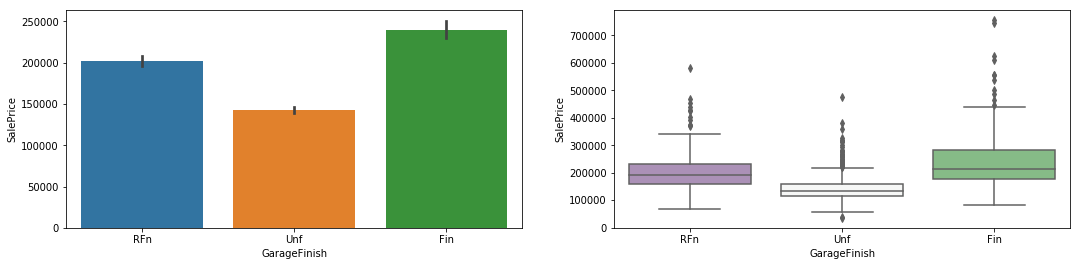

In [132]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)
sns.barplot(data=train, x="GarageFinish", y="SalePrice", ax=ax1)
sns.boxplot(x="GarageFinish", y="SalePrice", data=train, palette="PRGn", ax=ax2)

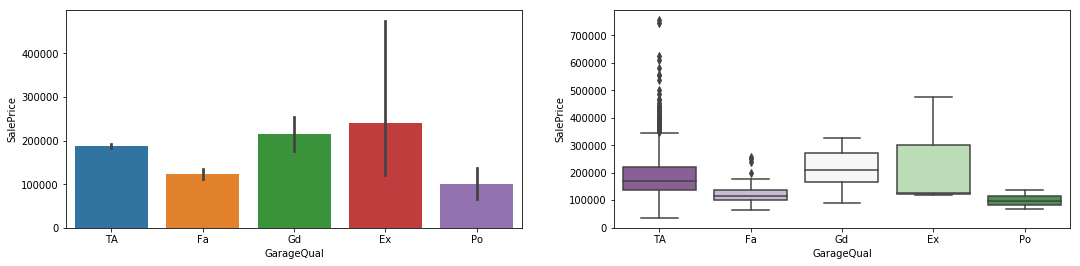

In [133]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)
sns.barplot(data=train, x="GarageQual", y="SalePrice", ax=ax1)
sns.boxplot(x="GarageQual", y="SalePrice", data=train, palette="PRGn", ax=ax2)

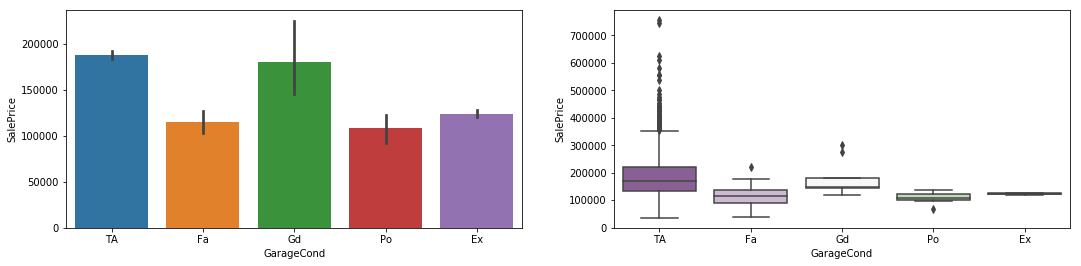

In [134]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)
sns.barplot(data=train, x="GarageCond", y="SalePrice", ax=ax1)
sns.boxplot(x="GarageCond", y="SalePrice", data=train, palette="PRGn", ax=ax2)

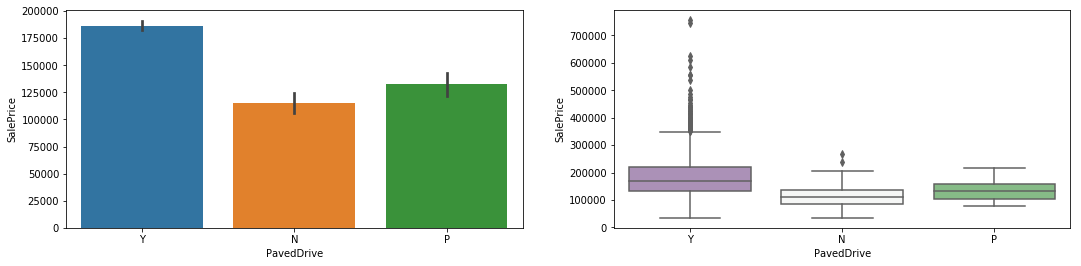

In [135]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)
sns.barplot(data=train, x="PavedDrive", y="SalePrice", ax=ax1)
sns.boxplot(x="PavedDrive", y="SalePrice", data=train, palette="PRGn", ax=ax2)

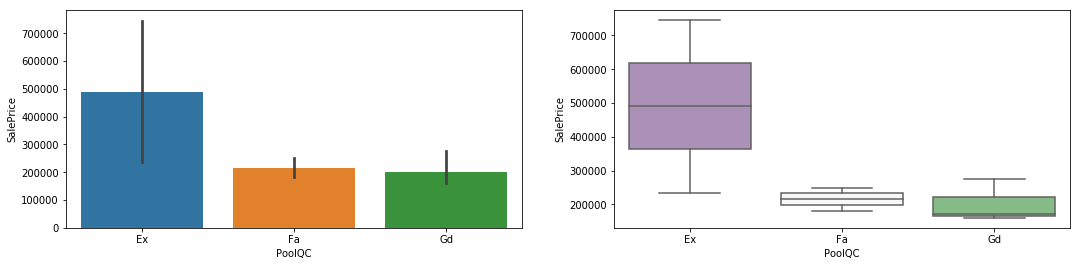

In [136]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)
sns.barplot(data=train, x="PoolQC", y="SalePrice", ax=ax1)
sns.boxplot(x="PoolQC", y="SalePrice", data=train, palette="PRGn", ax=ax2)

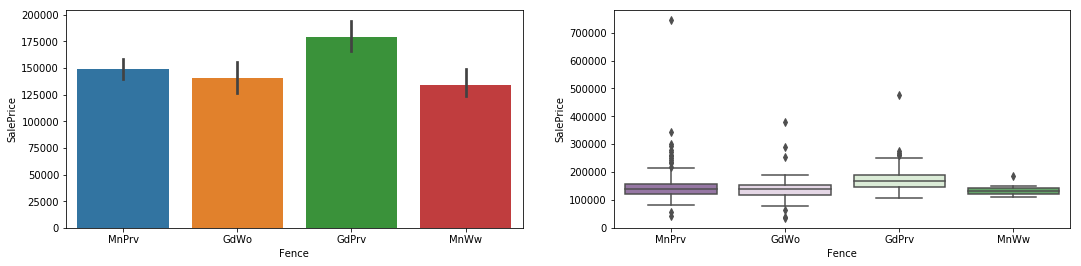

In [137]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)
sns.barplot(data=train, x="Fence", y="SalePrice", ax=ax1)
sns.boxplot(x="Fence", y="SalePrice", data=train, palette="PRGn", ax=ax2)

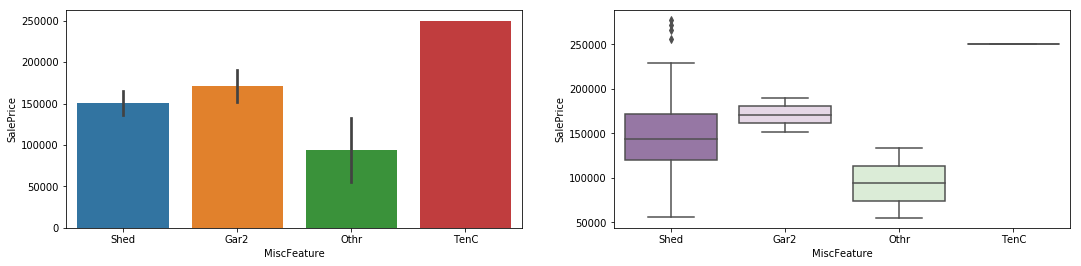

In [138]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)
sns.barplot(data=train, x="MiscFeature", y="SalePrice", ax=ax1)
sns.boxplot(x="MiscFeature", y="SalePrice", data=train, palette="PRGn", ax=ax2)

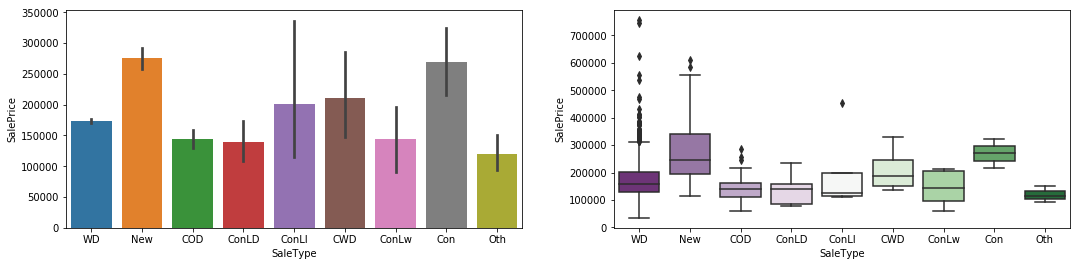

In [139]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)
sns.barplot(data=train, x="SaleType", y="SalePrice", ax=ax1)
sns.boxplot(x="SaleType", y="SalePrice", data=train, palette="PRGn", ax=ax2)

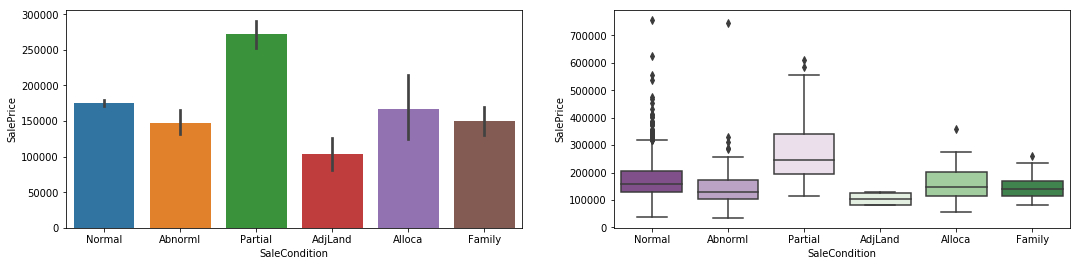

In [140]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)
sns.barplot(data=train, x="SaleCondition", y="SalePrice", ax=ax1)
sns.boxplot(x="SaleCondition", y="SalePrice", data=train, palette="PRGn", ax=ax2)